In [780]:
SAVE = True 
SAVE_PATH = "../charts/"

In [781]:
def reversed_sort_dict_by_value(dic:dict)-> dict:
    return {key:val for key, val in reversed(sorted(dic.items(), key=lambda item: item[1]))}

In [782]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("../store/found.csv")
df.head()

,peer,cid,filesAsStr
0,QmaCpDMGvV2BGHeYERUEnRQAwe3N8SzbUtfsmvsqQLuvuJ,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn,NaN
1,12D3KooWHbJkXi3kvH1NaN6FBGsQ9ic9Z1mA7CDEfGX8oo...,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn,NaN
2,12D3KooWEfdPqAWcTFjtNjaV6wdrueHZTDGjBY4rNqtago...,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn,NaN
3,12D3KooWF5AjPvayL8jc2Zxf1BBHN3M2nwtjkz7PvDzZtk...,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn,NaN
4,12D3KooWSw2fq2yUPSeq1qczKo3dLVuKYxQbPVC44n3JNm...,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn,NaN


In [783]:
EMPTY_CID = "QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn"
MY_PEERID = "12D3KooWBA3FLioUQPqtj3RT4fxbquGNyb2hfQwXq8UTt5xmxuCi"

In [784]:

df = df[df["peer"] != MY_PEERID]
total = len(df["peer"].unique())
total

2177

In [785]:
cids = []
peers = set()
for i, cid in enumerate(df["cid"].dropna().unique()[:20]):
    if cid != None or cid != EMPTY_CID:
        cids.append(cid)
print(cids)

for i, peer in enumerate(df["peer"]):
    try: 
        cid = df["cid"][i+1]
        if cid in cids:
            cids.remove(cid)
            peers.add(peer)
    except:
        continue
print(peers)

['QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn', 'QmdK8wjTD8jxW2hRKBycfohQQQm6DhC8KYQ4U2EWoNohGd', 'QmPKCe54r1J33YiN5yY2dAzupYtmVUFhjd5HxGKVP9uwDd', 'QmauhUbPerCeRjJAbPCoDAdASuzWJ9sMrx5k7FUPeSQDyU', 'QmbhXhzx9eY9e5QpbeDXQ2ozk9KgdJ7VALgfXRCbohtsD5', 'QmaJegxhjiqho2fv6pTHCAnXjZxWg2jAy9q6m1zsR3tPsk', 'QmbwnKjELQkfXissi1ryELBESQKPXyDvhC4hyjtvaQy7W9', 'QmU14JgCGns98PQoZ3oENV559jGnsG3kXtCjEKoqTbM7j9', 'bafybeianvbpki5s6gllgsw2cp3x34iy4f6dapw3dbogyfk2pr7dkwub4qy', 'QmepZt9TvmypWhq51TQAYJRs7bZicV3BefahjvY7exZCdL', 'QmecykvezTGQrwSzJWaZhJbjHr4UJt6ho3cgXvfDvVocsx', 'QmR9csTv1qZFiVujVkxJKm9yy3QwyAZkBfLzLTgQhAiLdN', 'QmYWAifyw2V5dEq7c5GgdSPffeKoYXQZggnYzw5RbXpig4', 'Qme8gpg6NkvL554e5wPHjjxpn8GoYq5ygL6x6q3zajacjV', 'Qmc4zaMAhGbtzmPWjiGuk3VkpGKDUJQdvFSQQtFEqx5hEH', 'QmYpr1Z6vWjjPuq3zYStsE26aNfW8rKV6kCxwzdkVYvZZY', 'QmbT8zmsDtNTnjiDVEW2jkSdH1NLwsjek1Aot9Kc7QAu6q', 'QmdnneN4xqwACHDS7BtHjRcjxp6XWDb37gGsJLibP3m2Sh', 'QmYnfgAZfX111YhkJNN5JKUYv38T4s3NhZ1wJssAWCiExk', 'QmVcvJcMPnJ4YEaHQyY3utT6cxsGvVBq51C

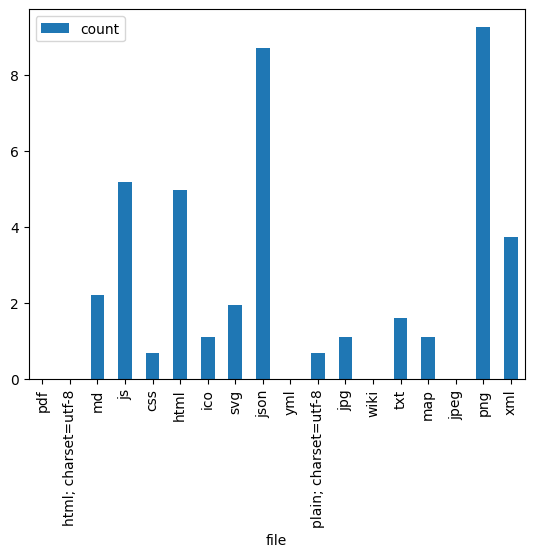

In [786]:
from collections import defaultdict
files = list(df["filesAsStr"][df["filesAsStr"].notnull()].values)
types_of_files = defaultdict(int) 
for file in files: 
    if "," in file: 
        for f in file.split(","):
            if "." in f: 
                types_of_files[f.split(".")[-1]]+=1
            elif "/" in f: 
                types_of_files[f.split("/")[1]]+=1
    else:
        types_of_files[file] +=1 
#del types_of_files["png"]
#del types_of_files["svg"]
#del types_of_files["json"]
temp = {
    "file":[],
    "count":[]
}
for k,v in types_of_files.items():
    temp["file"].append(k)
    temp["count"].append(np.log(v))
types_of_files = dict(types_of_files)
pd.DataFrame(temp).set_index("file").plot.bar()
if SAVE: 
    plt.savefig(SAVE_PATH+"format_count.png",bbox_inches='tight')

In [787]:
df_cids = df.dropna(subset=["cid"])[:1000]
df_cids[~df_cids['cid'].duplicated(keep=False)]["peer"].to_clipboard()


In [788]:
import pandas as pd 
df = pd.read_csv("../store/cid_data.csv")
df = df[df["peer"] != MY_PEERID]
df = df.drop_duplicates()
unique_nr_peers = len(df["peer"].unique())
print("number of unique peers with IPNS CID",unique_nr_peers)

number of unique peers with IPNS CID 25


## From cid data 

In [789]:
import pandas as pd 
df = pd.read_csv("../store/cid_data.csv")
df = df[df["peer"] != MY_PEERID]
df = df[df["peer"] != EMPTY_CID]
df["peer"] = df["peer"].apply(lambda p: p[:3] + '...' + p[-5:])
df = df.drop_duplicates()
df = df.reset_index(drop=True)
print(len(df["peer"].unique()))
df.head()

25


,peer,cid,filename,size,format
0,12D...s1we9,QmdK8wjTD8jxW2hRKBycfohQQQm6DhC8KYQ4U2EWoNohGd,NONE,82750,application/pdf
1,12D...s1we9,QmPKCe54r1J33YiN5yY2dAzupYtmVUFhjd5HxGKVP9uwDd,NONE,454,text/html; charset=utf-8
2,12D...K9Mwh,QmbhXhzx9eY9e5QpbeDXQ2ozk9KgdJ7VALgfXRCbohtsD5,NONE,18,text/plain; charset=utf-8
3,12D...t78kr,QmaJegxhjiqho2fv6pTHCAnXjZxWg2jAy9q6m1zsR3tPsk...,business_info.json,435,application/json
4,12D...t78kr,QmaJegxhjiqho2fv6pTHCAnXjZxWg2jAy9q6m1zsR3tPsk...,chat-tunnel.json,79,application/json


In [790]:
from collections import defaultdict
import copy
import numpy as np

peer_size = {}
peer_size["peer"] = df["peer"]
peer_size["size"] = df["size"]

peer_size_count = defaultdict(int)
for i, p in enumerate(peer_size["peer"]): 
    peer_size_count[p]+=peer_size["size"][i]

peer_size_count_no_filter = copy.deepcopy(peer_size_count)
peer_size_count_no_filter = reversed_sort_dict_by_value(peer_size_count_no_filter)
peer_size_count = {p:s for p,s in peer_size_count.items() if s > 2**1}

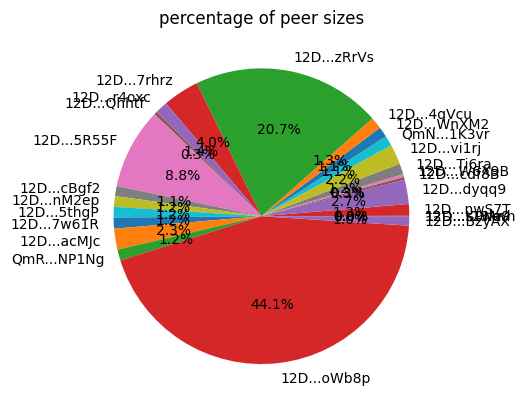

In [791]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.pie(list(peer_size_count.values()), labels=list(peer_size_count.keys()), autopct='%1.1f%%')
plt.title("percentage of peer sizes")

if SAVE: 
    plt.savefig(SAVE_PATH+"peer_size_pie.png",bbox_inches='tight')

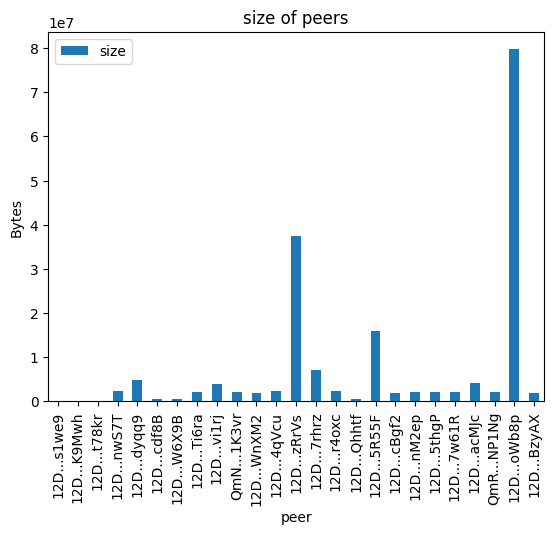

In [792]:
size_df = pd.DataFrame({"peer":list(peer_size_count.keys()), "size":list(peer_size_count.values())})
ax = size_df.set_index("peer").plot.bar(title="size of peers")
ax.set_ylabel("Bytes")
if SAVE: 
    plt.savefig(SAVE_PATH+"peer_size.png",bbox_inches='tight')

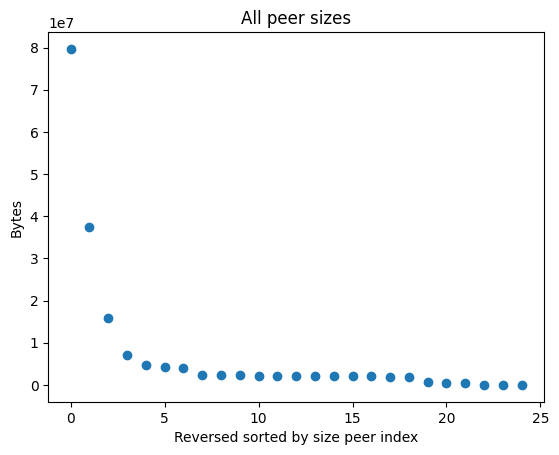

In [793]:

fig, ax = plt.subplots()
peer_size_count_no_filter = {peer_id: size for peer_id, size in reversed(sorted(peer_size_count_no_filter.items(), key=lambda item: item[1]))}

ax.scatter([i for i in range(len(peer_size_count_no_filter))],list(peer_size_count_no_filter.values()))
plt.title("All peer sizes")
plt.xlabel("Reversed sorted by size peer index")
plt.ylabel("Bytes")
if SAVE: 
    plt.savefig(SAVE_PATH+"peer_size_all.png",bbox_inches='tight')

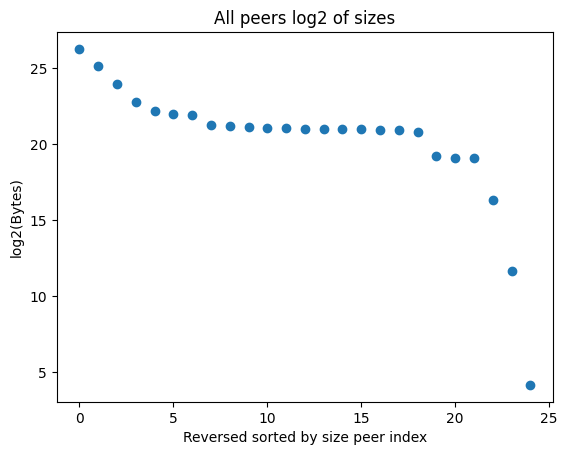

In [794]:
fig, ax = plt.subplots()
peer_size_count_no_filter_log = {peer_id: np.log2(size) for peer_id, size in reversed(sorted(peer_size_count_no_filter.items(), key=lambda item: item[1]))}

ax.scatter([i for i in range(len(peer_size_count_no_filter_log))],list(peer_size_count_no_filter_log.values()))
plt.title("All peers log2 of sizes")
plt.xlabel("Reversed sorted by size peer index")
plt.ylabel("log2(Bytes)")
if SAVE: 
    plt.savefig(SAVE_PATH+"peer_size_all_log.png",bbox_inches='tight')

In [795]:
df["format"].unique()

array(['application/pdf', 'text/html; charset=utf-8',
       'text/plain; charset=utf-8', 'application/json', 'image/png',
       'image/jpeg'], dtype=object)

average file size 180554177


180554177

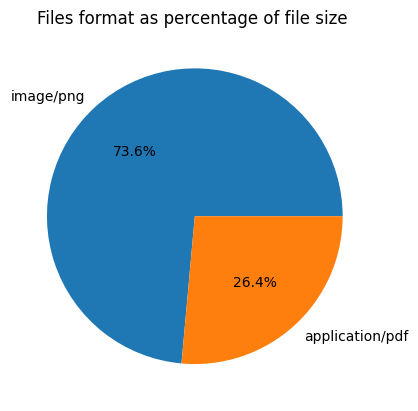

In [796]:
format_size_count = defaultdict(int)
_sum = 0
print("average file size", df["size"].sum())
for i, f in enumerate(df["format"]):
    size =  df["size"][i]
    format_size_count[f] += size
    _sum += size

format_size_count = {f:s for f,s in format_size_count.items() if s > 2**15}
format_size_count = reversed_sort_dict_by_value(format_size_count)

fig, ax = plt.subplots()
ax.pie(list(format_size_count.values()), labels=list(format_size_count.keys()), autopct='%1.1f%%')
plt.title("Files format as percentage of file size ")
if SAVE: 
    plt.savefig(SAVE_PATH+"files_format_prec.png",bbox_inches='tight')
_sum 

In [797]:

df.head()

,peer,cid,filename,size,format
0,12D...s1we9,QmdK8wjTD8jxW2hRKBycfohQQQm6DhC8KYQ4U2EWoNohGd,NONE,82750,application/pdf
1,12D...s1we9,QmPKCe54r1J33YiN5yY2dAzupYtmVUFhjd5HxGKVP9uwDd,NONE,454,text/html; charset=utf-8
2,12D...K9Mwh,QmbhXhzx9eY9e5QpbeDXQ2ozk9KgdJ7VALgfXRCbohtsD5,NONE,18,text/plain; charset=utf-8
3,12D...t78kr,QmaJegxhjiqho2fv6pTHCAnXjZxWg2jAy9q6m1zsR3tPsk...,business_info.json,435,application/json
4,12D...t78kr,QmaJegxhjiqho2fv6pTHCAnXjZxWg2jAy9q6m1zsR3tPsk...,chat-tunnel.json,79,application/json


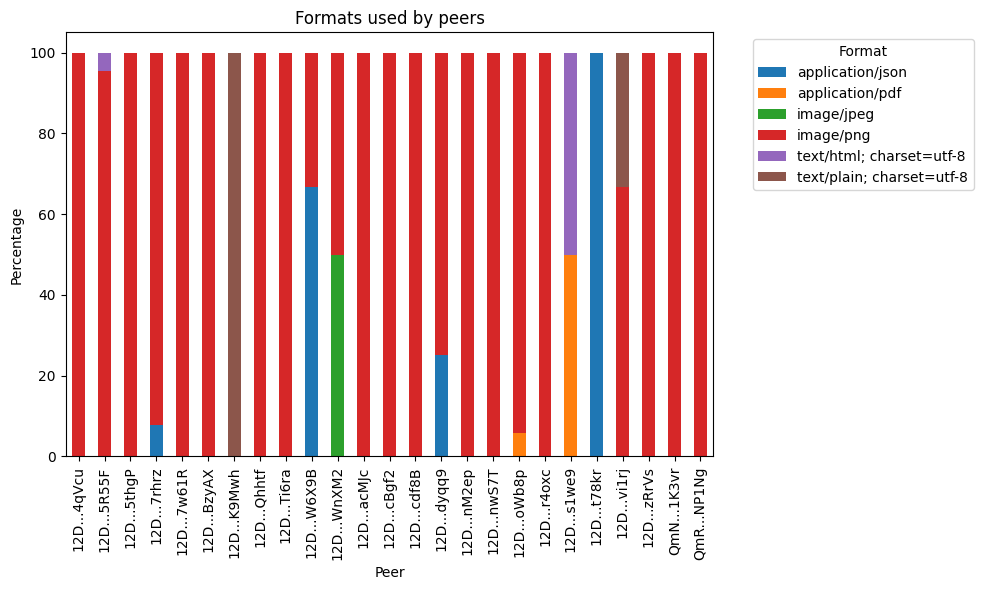

In [798]:
df_format_prec = df.groupby(['peer', 'format']).size().unstack(fill_value=0)
df_format_prec = df_format_prec.div(df_format_prec.sum(axis=1), axis=0) * 100
df_format_prec.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Peer')
plt.ylabel('Percentage')
plt.title('Formats used by peers')
plt.legend(title='Format', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

if SAVE: 
    plt.savefig(SAVE_PATH+"formats_used_by_nodes.png",bbox_inches='tight')


/tmp/ipykernel_18295/111412912.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["filename"][i] = df_temp["format"][i]
/tmp/ipykernel_18295/111412912.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["filename"][i] = df_temp["format"][i]
/tmp/ipykernel_18295/111412912.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_temp["filename"][i] = df_temp["format"][i]
/tmp/ipykernel_18295/111412912.py:7: SettingWithCopy

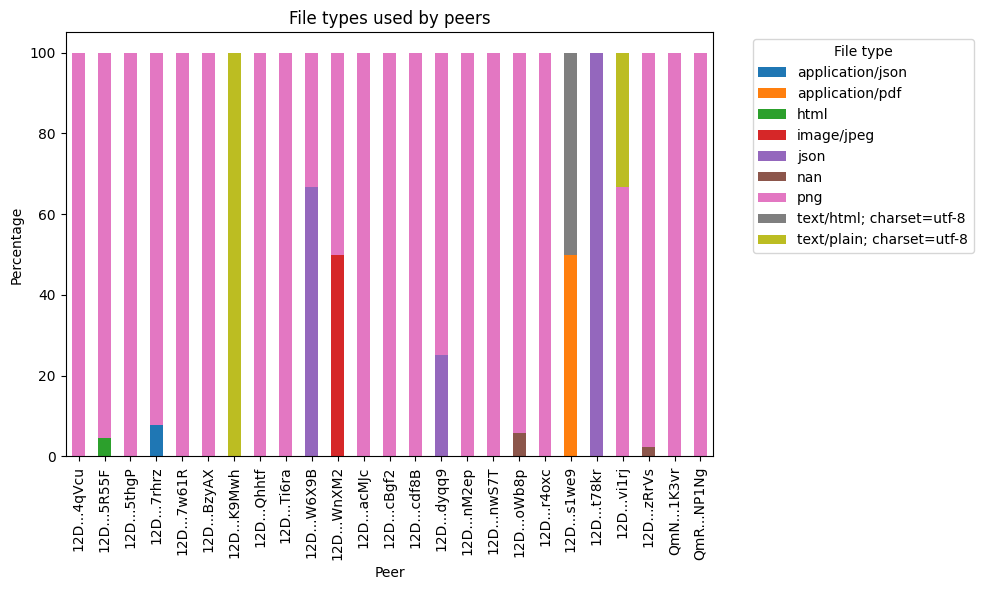

In [799]:
df_temp = df.copy()
df_temp["filename"] = df_temp["filename"].apply(lambda f: str(f))
df_temp["filename"] = df_temp["filename"].apply(lambda f: ''.join([c for c in f if not c.isdigit()]))
df_temp["filename"] = df_temp["filename"].apply(lambda f: f.split(".")[-1])
for i, filename in enumerate(df_temp["filename"]):
    if filename == "NONE":
        df_temp["filename"][i] = df_temp["format"][i]
df_file_name_peer = df_temp.groupby(['peer', 'filename']).size().unstack(fill_value=0)
df_file_name_peer= df_file_name_peer.div(df_file_name_peer.sum(axis=1), axis=0) * 100
df_file_name_peer.plot(kind='bar', stacked=True, figsize=(10, 6))
plt.xlabel('Peer')
plt.ylabel('Percentage')
plt.title('File types used by peers')
plt.legend(title='File type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()


In [800]:
df.head()

,peer,cid,filename,size,format
0,12D...s1we9,QmdK8wjTD8jxW2hRKBycfohQQQm6DhC8KYQ4U2EWoNohGd,NONE,82750,application/pdf
1,12D...s1we9,QmPKCe54r1J33YiN5yY2dAzupYtmVUFhjd5HxGKVP9uwDd,NONE,454,text/html; charset=utf-8
2,12D...K9Mwh,QmbhXhzx9eY9e5QpbeDXQ2ozk9KgdJ7VALgfXRCbohtsD5,NONE,18,text/plain; charset=utf-8
3,12D...t78kr,QmaJegxhjiqho2fv6pTHCAnXjZxWg2jAy9q6m1zsR3tPsk...,business_info.json,435,application/json
4,12D...t78kr,QmaJegxhjiqho2fv6pTHCAnXjZxWg2jAy9q6m1zsR3tPsk...,chat-tunnel.json,79,application/json


5
[]
number of markdown files: 0


Text(0.5, 0, 'File extension ')

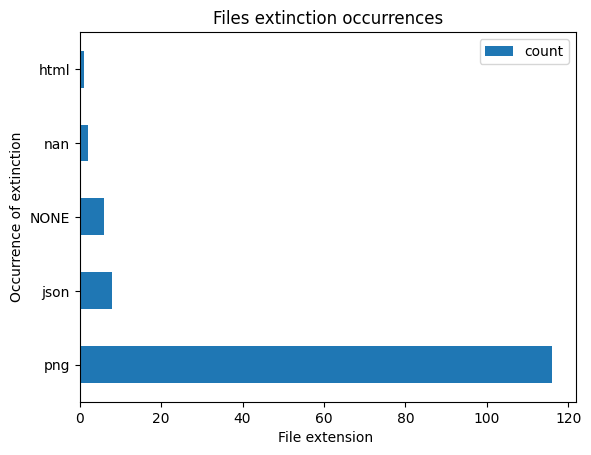

In [801]:
file_type_count = defaultdict(int)
markdown_files = []
for t in df["filename"]:
    ftype = str(t).split(".")[-1]
    ftype = ''.join([c for c in ftype if not c.isdigit()])
    if ftype == "":
        ftype = str(t)
    if ftype == "md": 
        markdown_files.append(t)
    file_type_count[ftype] += 1 

file_type_count = {t:c for t,c in file_type_count.items() if c > 0}
file_type_count = reversed_sort_dict_by_value(file_type_count)
print(len(file_type_count))

print(markdown_files)
print("number of markdown files:", len(markdown_files))

file_type_count = dict(file_type_count)
file_type_count = pd.DataFrame({"filetype": list(file_type_count.keys()), "count":list(file_type_count.values())})
file_type_count = file_type_count.set_index("filetype")
file_type_count.plot.barh()
plt.title("Files extinction occurrences")
plt.ylabel("Occurrence of extinction")
plt.xlabel("File extension ")




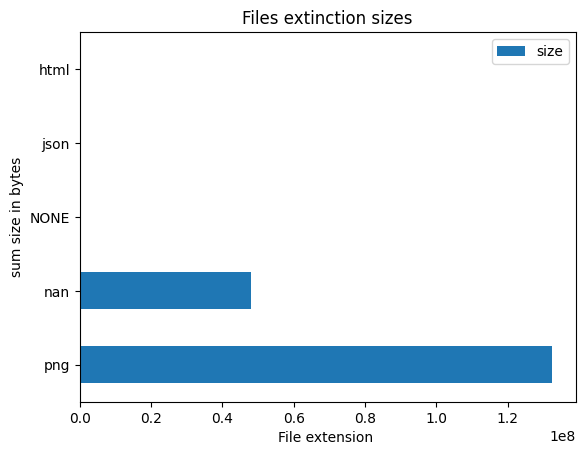

In [802]:
import numpy as np
file_type_size = defaultdict(int)
for i,t in enumerate(df["filename"]):
    ftype = str(t).split(".")[-1]
    ftype = ''.join([c for c in ftype if not c.isdigit()])
    if ftype == "":
        ftype = str(t)
    file_type_size[ftype] += int(df["size"][i])

file_type_count = dict(file_type_count)
file_type_size = { t:s for t,s in file_type_size.items() if s > 2**2}
file_type_size = reversed_sort_dict_by_value(file_type_size)

file_type_size = pd.DataFrame({"filetype": list(file_type_size.keys()), "size":list(file_type_size.values())})
file_type_size = file_type_size.set_index("filetype")
file_type_size.plot.barh()
plt.title("Files extinction sizes")
plt.ylabel("sum size in bytes")
plt.xlabel("File extension ")


if SAVE: 
    plt.savefig(SAVE_PATH+"file_extinction_size.png",bbox_inches='tight')

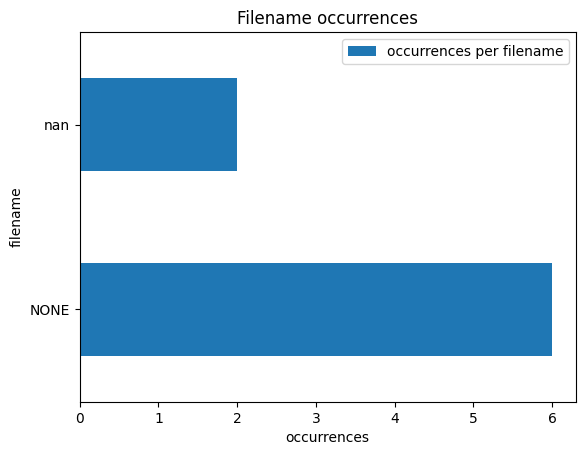

In [803]:
file_names_count = defaultdict(int)

for name in df["filename"]:
    file_names_count[str(name)] += 1

file_names_count = { f:c for f,c in file_names_count.items() if c > 1 }
file_names_count = reversed_sort_dict_by_value(file_names_count)


file_names_count = pd.DataFrame({"filename": list(file_names_count.keys()), "occurrences per filename":list(file_names_count.values())})
file_names_count = file_names_count.set_index("filename")
file_names_count.plot.barh()
plt.title("Filename occurrences")
plt.xlabel("occurrences")


if SAVE: 
    plt.savefig(SAVE_PATH+"filename_count.png",bbox_inches='tight')


In [804]:
searchable = []
for i, filename in enumerate(df["filename"]): 
        if "readme" in str(filename).lower():
            searchable.append(df["cid"][i])
            print(df["cid"][i])
            print("-"*10)

print("Number of possible readme files: ",len(searchable))

Number of possible readme files:  0


In [805]:
peers_with_index = []
for i,fn in enumerate(df["filename"]):
    p = df["cid"][i].split("/")[0]
    if "index.html" in str(fn) and not p in peers_with_index and p != "":
        peers_with_index.append(p)
print("Number of websites found:",len(peers_with_index))
print(peers_with_index)

Number of websites found: 1
['QmYnfgAZfX111YhkJNN5JKUYv38T4s3NhZ1wJssAWCiExk']


format count relative to node size, meaning that files that occurs often on a lot of different nodes are the most relevant nodes.  

Peers with html: 2
6


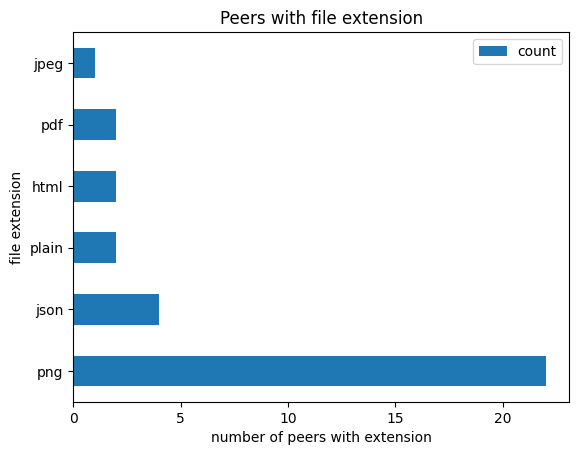

In [806]:
file_extension_peer_distribution = defaultdict(set)
NUMBER_OF_OCCURRENCES_MINIMUM = 0
for i,fn in enumerate(df["filename"]):
    file_extension = str(fn).split(".")[-1]
    if file_extension == "NONE" or file_extension == "nan":
        file_extension = df["format"][i].split(";")[0].split("/")[-1]
    peer = df["peer"][i]
    file_extension_peer_distribution[file_extension].add(peer)
print("Peers with html:",len(file_extension_peer_distribution["html"]))
file_extension_peer_distribution= {p:len(s) for p,s in file_extension_peer_distribution.items() if len(s) > NUMBER_OF_OCCURRENCES_MINIMUM}
print(len(file_extension_peer_distribution))
file_extension_peer_distribution = reversed_sort_dict_by_value(file_extension_peer_distribution)
fe_df = pd.DataFrame({"file extension":list(file_extension_peer_distribution.keys()), "count": list(file_extension_peer_distribution.values())})
fe_df = fe_df.set_index("file extension")
fe_df.plot.barh()
plt.title("Peers with file extension")
plt.xlabel("number of peers with extension")


if SAVE: 
    plt.savefig(SAVE_PATH+"peer_count_with_extension.png",bbox_inches='tight')

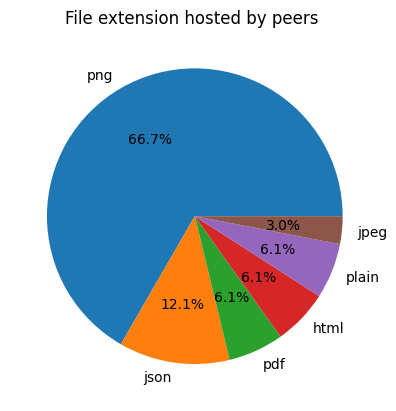

In [807]:
unique_nr_peers = len(df["peer"].unique())
file_extension_peer_distribution_prec = {p:s / unique_nr_peers for p,s in file_extension_peer_distribution.items()}
file_extension_peer_distribution_prec = reversed_sort_dict_by_value(file_extension_peer_distribution_prec)
fig, ax = plt.subplots()
ax.pie(list(file_extension_peer_distribution_prec.values()), labels=list(
    file_extension_peer_distribution_prec.keys()), autopct='%1.1f%%')
plt.title("File extension hosted by peers ")

if SAVE: 
    plt.savefig(SAVE_PATH+"peer_count_with_extension_pie.png",bbox_inches='tight')

In [808]:
cnt = 0 
for i,cid in enumerate(df["cid"].unique()):
    if cid:
        cnt+=1
print(cnt)

133


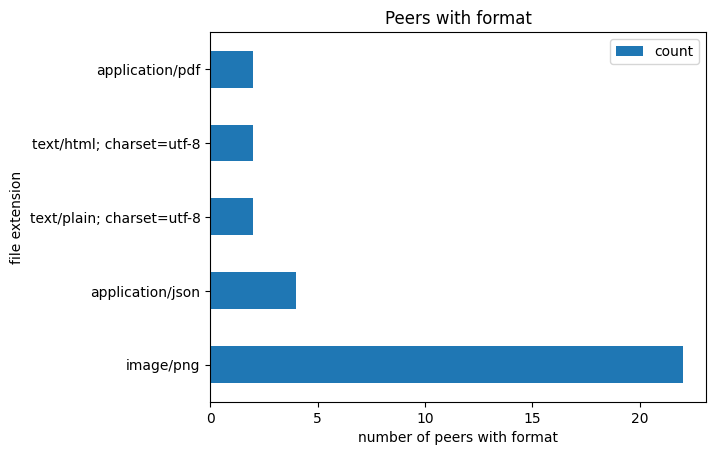

In [809]:
format_peer_distribution = defaultdict(set)
NUMBER_OF_OCCURRENCES_MINIMUM = 1

for i,fn in enumerate(df["filename"]):
    _format = df["format"][i]#.split("/")[0]
    peer = df["peer"][i]
    format_peer_distribution[_format].add(peer)

format_peer_distribution = {p:len(s) for p,s in format_peer_distribution.items() if len(s) > NUMBER_OF_OCCURRENCES_MINIMUM}
format_peer_distribution = reversed_sort_dict_by_value(format_peer_distribution)
fe_df = pd.DataFrame({"file extension":list(format_peer_distribution.keys()), "count": list(format_peer_distribution.values())})
fe_df = fe_df.set_index("file extension")
fe_df.plot.barh()
plt.title("Peers with format")
plt.xlabel("number of peers with format")

if SAVE: 
    plt.savefig(SAVE_PATH+"peers_count_format.png",bbox_inches='tight')

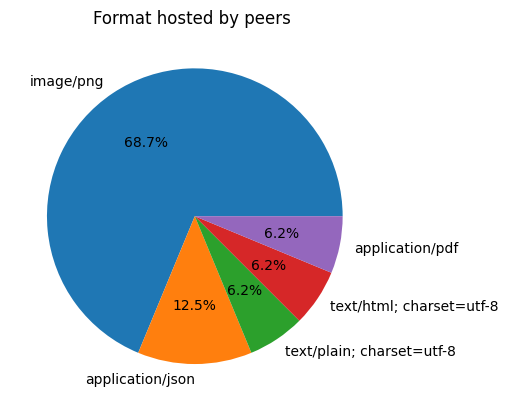

In [810]:
unique_nr_peers = len(df["peer"].unique())
format_peer_distribution_prec = {p:s / unique_nr_peers for p,s in format_peer_distribution.items()}
fig, ax = plt.subplots()
ax.pie(list(format_peer_distribution_prec.values()), labels=list(
    format_peer_distribution_prec.keys()), autopct='%1.1f%%')
plt.title("Format hosted by peers ")

if SAVE: 
    plt.savefig(SAVE_PATH+"peers_count_format_pie.png",bbox_inches='tight')

### Looking at the times of found peers


In [811]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

In [812]:
df = pd.read_csv("../store/time.csv")
print(len(df["peer"]))
print(len(df[df["cid"] != EMPTY_CID]))
df.head()

2183
210


,peer,time,cid
0,QmaCpDMGvV2BGHeYERUEnRQAwe3N8SzbUtfsmvsqQLuvuJ,2023-06-28 10:04:03,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn
1,12D3KooWHbJkXi3kvH1NaN6FBGsQ9ic9Z1mA7CDEfGX8oo...,2023-06-28 10:04:04,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn
2,12D3KooWEfdPqAWcTFjtNjaV6wdrueHZTDGjBY4rNqtago...,2023-06-28 10:04:05,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn
3,12D3KooWF5AjPvayL8jc2Zxf1BBHN3M2nwtjkz7PvDzZtk...,2023-06-28 10:04:06,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn
4,12D3KooWSw2fq2yUPSeq1qczKo3dLVuKYxQbPVC44n3JNm...,2023-06-28 10:04:07,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn


In [813]:
df['time'] = pd.to_datetime(df['time'])
df = df[df["peer"] != MY_PEERID]

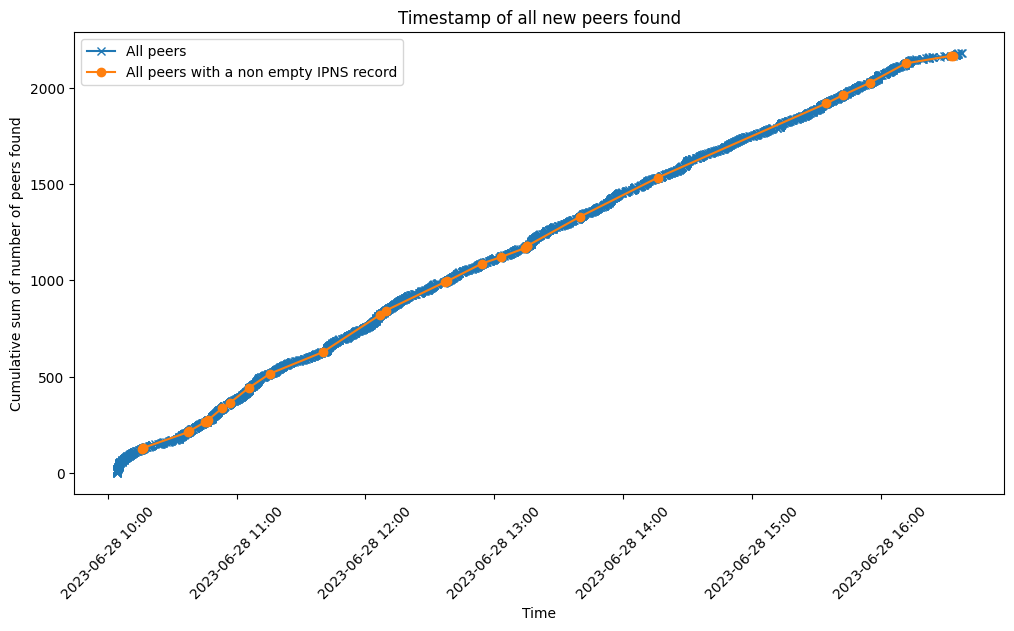

In [814]:
plt.figure(figsize=(12, 6))
df.reset_index(drop=True, inplace=True)
x = df["time"]
y = df.index.to_list()
df = df[df["cid"] != EMPTY_CID]
df = df[df["cid"] != "NONE"]
plt.xlabel('Time')
plt.ylabel('Cumulative sum of number of peers found')
plt.title('Timestamp of all new peers found')
date_format = mdates.DateFormatter('%Y-%m-%d %H:%M')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.plot(x, y, marker='x', label="All peers")
plt.plot(df['time'], df.index, marker='o', label="All peers with a non empty IPNS record")
plt.legend()
plt.show()

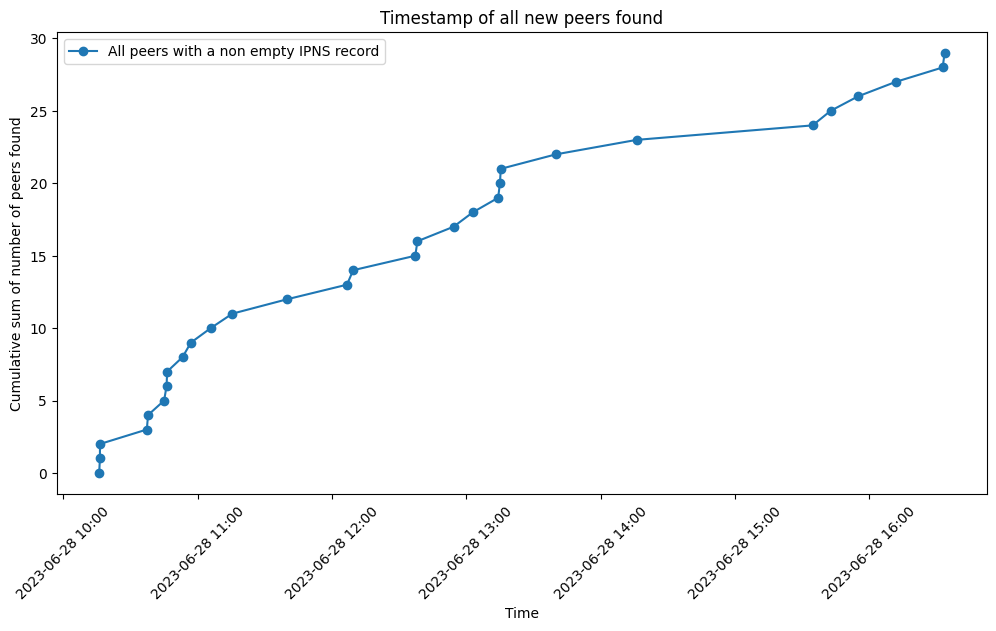

In [815]:
plt.figure(figsize=(12, 6))
df.reset_index(drop=True, inplace=True)
plt.xlabel('Time')
plt.ylabel('Cumulative sum of number of peers found')
plt.title('Timestamp of all new peers found')
date_format = mdates.DateFormatter('%Y-%m-%d %H:%M')
plt.gca().xaxis.set_major_formatter(date_format)
plt.xticks(rotation=45)
plt.plot(df['time'], df.index, marker='o', label="All peers with a non empty IPNS record")
plt.legend()
plt.show()

Text(0.5, 1.0, 'time between finding IPNS records')

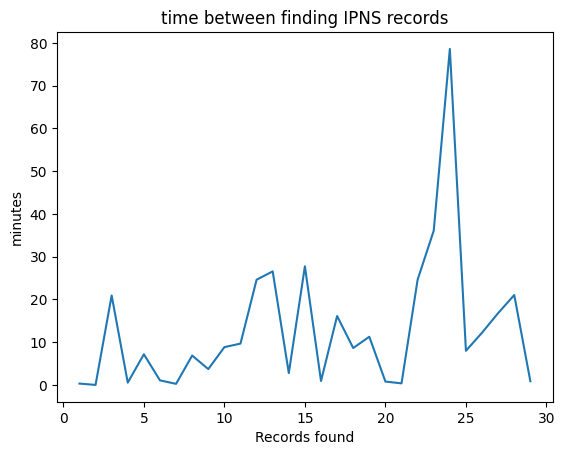

In [816]:
time_diff = df['time'].diff().dt.total_seconds() / 60
time_diff.plot()
plt.ylabel("minutes")
plt.xlabel("Records found")
plt.title("time between finding IPNS records")


### Number of peers hosting cids

In [817]:
from collections import defaultdict
import matplotlib.ticker as ticker

In [818]:
df = pd.read_csv("../store/number_of_hosts.csv")
print(len(df))
df.head()

2001


,cid,peer,other_peers
0,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn,QmaCpDMGvV2BGHeYERUEnRQAwe3N8SzbUtfsmvsqQLuvuJ,12D3KooWDc2FZKCVA28U8QTejqR5Wu7hmQw7HnwFNnh84e...
1,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn,12D3KooWHbJkXi3kvH1NaN6FBGsQ9ic9Z1mA7CDEfGX8oo...,12D3KooWDc2FZKCVA28U8QTejqR5Wu7hmQw7HnwFNnh84e...
2,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn,12D3KooWEfdPqAWcTFjtNjaV6wdrueHZTDGjBY4rNqtago...,12D3KooWDc2FZKCVA28U8QTejqR5Wu7hmQw7HnwFNnh84e...
3,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn,12D3KooWF5AjPvayL8jc2Zxf1BBHN3M2nwtjkz7PvDzZtk...,12D3KooWDc2FZKCVA28U8QTejqR5Wu7hmQw7HnwFNnh84e...
4,QmUNLLsPACCz1vLxQVkXqqLX5R1X345qqfHbsf67hvA3Nn,12D3KooWSw2fq2yUPSeq1qczKo3dLVuKYxQbPVC44n3JNm...,12D3KooWDc2FZKCVA28U8QTejqR5Wu7hmQw7HnwFNnh84e...


In [819]:
cid_hosts_count = defaultdict(int)
#df = df[df["cid"] != EMPTY_CID]
for i, peers in enumerate(df["other_peers"]):
    if pd.notna(peers):
        filtered_peers = [p for p in peers.split(",") if p != MY_PEERID]
        nr_peers = len(filtered_peers)
        cid_hosts_count[i] += nr_peers

#cid_hosts_count = {k:v for k,v in cid_hosts_count.items() if v != 20}

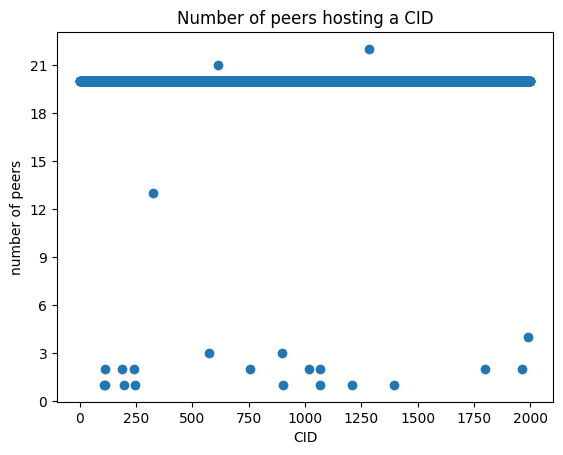

In [820]:
cid_hosts = pd.DataFrame({"cid":list(cid_hosts_count.keys()), "peers":list(cid_hosts_count.values())})
cid_hosts = cid_hosts.set_index("cid")
fig, ax = plt.subplots()
ax.scatter(x=list(cid_hosts_count.keys()), y=list(cid_hosts_count.values()))
ax.yaxis.set_major_locator(ticker.MaxNLocator(integer=True))
plt.title("Number of peers hosting a CID")
plt.ylabel("number of peers")
plt.xlabel("CID")
plt.show()